# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

Escribe tu número de expediente como semilla

In [1]:
import numpy as np
np.random.seed(747243)

empresas = ["Spotify", "Mercado Libre", "Microsoft", "Walmart", "Google", "Tesla", "Netflix", "Amazon", "Oracle", "Intel"]

print("Simulación Monte Carlo - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 1 - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 2 - Función " + str(np.random.choice([1, 2])))
print("Fractales - Fractal " + str(np.random.choice([1, 2])))
print("Probabilidad Precio-Umbral - Empresas: (" + str(np.random.choice(empresas, 2, replace=False)) + ")")

Simulación Monte Carlo - Problema 2
Integración Monte Carlo Tipo 1 - Problema 1
Integración Monte Carlo Tipo 2 - Función 1
Fractales - Fractal 2
Probabilidad Precio-Umbral - Empresas: (['Microsoft' 'Google'])


---
### Simulación Monte Carlo - Problema 1

Un proyecto de construcción en una casa está por comenzar. Se hace la compra de los materiales y el proveedor dice que en promedio tardan una semana con 2 días de desviación estándar en llegar. Una vez llegados los materiales se tarda entre 2 y 3 semanas en construir (uniforme). Después de la construcción debes esperar 3 días antes de empezar a pintar, y te toma 4 días en promedio con medio día de desviación estándar hacerlo.

1. Define una función que te regrese el tiempo total de inicio a fin de proyecto dados los tiempos que toma cada paso.

In [28]:
import random

def tiempototalproyecto():
    
    tiempoentrega = random.gauss(7, 2)  
    tiempoconstruccion = random.uniform(14, 21)  
    tiempopinturaa = 3
    tiempopintar = random.gauss(4, 0.5)  
    tiempo = tiempoentrega + tiempoconstruccion + tiempopinturaa + tiempopintar
    
    return tiempo

tiempo_total_proyecto = tiempototalproyecto()
print(f"El tiempo total del proyecto es de {tiempo_total_proyecto} dias.")



El tiempo total del proyecto es de 32.252330954818184 días.


2. Escribe en una celda de Markdown qué distribución usarías para cada paso del proceso.

**Entrega de Materiales :**

Distribucion Normal, nos hace saber que hay un promedio (media) para la entrega de materiales el cual es 7 dias, con una desviacion estandar de 2 dias, el cual se refiere a que puede variar alrededor de los 7 dias 


**Tiempo de Construccion :**

Distribucion Uniforme, ya que hablamos de un rango de tiempo, el cual fue de 2 a 3 semanas.


**Tiempo antes  Pintar :**

Se toma como una constante ya que no sigue ningun tipo de distribucion


**Tiempo Pintar :**

Distribucion Normal, ya que de nuevo nos dan un promedio(media) de 4 dias, y tiene una variacion de medio dia sobre la media.

3. Simula cada paso en el proceso un millón de veces.

In [25]:
def simular_Pr(num_simulaciones):
    tiempototal = []
    
    for _ in range(num_simulaciones):
        tiempoentrega = tiempo_entrega_materiales()
        tiempoconstruccion = tiempo_construccion()
        tiempopinturaa = 3
        tiempopintar = tiempo_pintura()
        
        tiempo = tiempoentrega + tiempoconstruccion + tiempopinturaa + tiempopintar
        tiempototal.append(tiempo)
    
    return tiempototal

num_simulaciones = 1000000
resultados_simulacion = simular_Pr(num_simulaciones)

media = sum(resultados_simulacion) / num_simulaciones
desviación_estandar = (sum((x - media) ** 2 for x in resultados_simulacion) / (num_simulaciones - 1)) ** 0.5

print(f"Media tiempos totales: {media}")
print(f"Desviación estándar tiempos totales: {desviación_estandar}")



Media tiempos totales: 31.498479188005014
Desviación estándar tiempos totales: 2.885488513021485


4. Agrupa las simulaciones de cada paso para tener la simulación del proceso completo.

In [30]:
import random

def tiempo_entrega_materiales():
    return random.gauss(7, 2)

def tiempo_construccion():
    return random.uniform(14, 21)

def tiempo_pintura():
    return random.gauss(4, 0.5)

def simular_proceso_completo(num_simulaciones):
    tiempos_totales = []

    for _ in range(num_simulaciones):
        tiempo_entrega = tiempo_entrega_materiales()
        tiempo_construir = tiempo_construccion()
        tiempo_esperar_pintura = 3
        tiempo_pintar = tiempo_pintura()
        
        tiempo_total = tiempo_entrega + tiempo_construir + tiempo_esperar_pintura + tiempo_pintar
        tiempos_totales.append(tiempo_total)

    return tiempos_totales

num_simulaciones = 1000000
resultados_simulacion = simular_proceso_completo(num_simulaciones)

media = sum(resultados_simulacion) / num_simulaciones
desviacion_estandar = (sum((x - media) ** 2 for x in resultados_simulacion) / (num_simulaciones - 1)) ** 0.5

5. ¿Cuál es el tiempo promedio para el inicio-fin del proyecto?

In [34]:
print(f"tiempo promedio para el inicio-fin del proyecto: {media} dias")

tiempo promedio para el inicio-fin del proyecto: 31.50323115358313 dias


6. Dadas tus simulaciones, ¿cuál fue el tiempo mínimo? ¿El máximo?

In [35]:
tiempo_minimo = min(resultados_simulacion)
tiempo_maximo = max(resultados_simulacion)

print(f"Tiempo mínimo: {tiempo_minimo} dias")
print(f"Tiempo máximo: {tiempo_maximo} dias")


Tiempo mínimo: 19.775945171314355 dias
Tiempo máximo: 43.36148972273058 dias


7. Grafica un histograma con tus resultados.

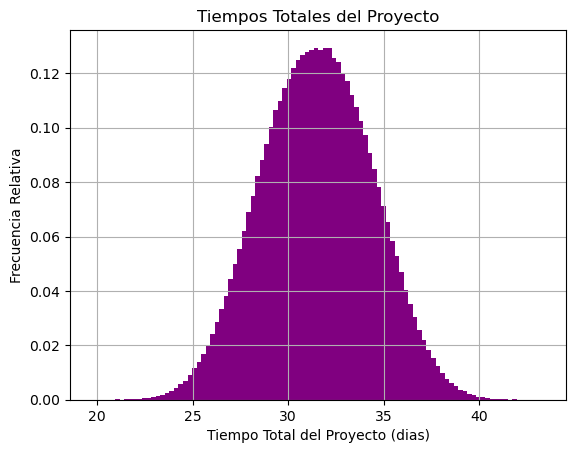

In [45]:
import matplotlib.pyplot as plt

plt.hist(resultados_simulacion, bins=100 , density=True, alpha=1, color='purple')
plt.xlabel('Tiempo Total del Proyecto (dias)')
plt.ylabel('Frecuencia Relativa')
plt.title('Tiempos Totales del Proyecto')
plt.grid(True)

plt.show()


### Simulación Monte Carlo - Problema 2

Hay un elevador pequeño en una plaza donde se espera que entren máximo 4 personas a la vez, y su capacidad de peso para poder operar es de 320 kg.

Datos estadísticos de las personas que viven en esa zona mencionan que hay un 49% de mujeres, un 43% de hombres, y un 7% de personas que o prefirieron no contestar la pregunta o se identificaron como no binarias. El peso promedio medido en mujeres es de 68.7 kg con una desviación estándar de 7 kg. En los hombres se midió un peso promedio de 74.8 kg y una desviación estándar de 9 kg. En el tercer grupo se midió un peso promedio de 72 kg con una desviación estándar de 8 kg.

1. Escribe una función que retorne un peso dentro de los estadísticos dados. 

In [51]:
import random

def peso():
    grupo = random.random()
    
    if grupo <= 0.49: 
        peso_promedio = 68.7
        desviacion_estandar = 7
    elif grupo <= 0.92:  
        peso_promedio = 74.8
        desviacion_estandar = 9
    else:  
        peso_promedio = 72
        desviacion_estandar = 8

    peso = random.gauss(peso_promedio, desviacion_estandar)

    return peso

pesoper = peso()
print(f"Peso generado: {pesoper} kg")


Peso generado: 72.26205365430606 kg


2. Si el elevador se llenara 10,000 veces, ¿cuántas de esas veces se excedería el peso permitido?

In [58]:
import random

def simulacion(n_simulaciones):
    pesolimite = 320
    excedido = 0
    
    for _ in range(n_simulaciones):
        pesosper = [generar_peso() for _ in range(4)]
        pesoTTL = sum(pesosper)
        
        if pesoTTL > pesolimite:
            excedido += 1

    return excedido

n_simulaciones = 10000
vecesex = simular_elevador(n_simulaciones)
print(f"El peso se excedió {vecesex} veces")

El peso se excedió 269 veces


---
### Integración Monte Carlo tipo 1 - Problema 1

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{2xe^{-x^2}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [13]:
import random
import math

def montecarlo(f, a, b, N):
    integral = 0
    for _ in range(N):
        x = random.uniform(a, b)
        integral += f(x)
    integral *= (b - a) / N
    return integral


In [14]:
def f(x):
    return (math.log(2 + math.sin(2 * x**2))) / (2 * x * math.exp(-x**2))

intervalos = [(0.1, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.1)]

N = 10**6

integrals = []  
for a, b in intervalos:
    result = montecarlo(f, a, b, N)
    integrals.append(result)

for i, (a, b) in enumerate(intervalos):
    print(f"Integral en el intervalo ({a} <= x <= {b}): {integrals[i]}")

Integral en el intervalo (0.1 <= x <= 0.3): 0.4155834345313923
Integral en el intervalo (0.3 <= x <= 0.5): 0.2502547809934282
Integral en el intervalo (0.5 <= x <= 0.7): 0.2350617290435556
Integral en el intervalo (0.7 <= x <= 0.9): 0.25755668216948324
Integral en el intervalo (0.9 <= x <= 1.1): 0.28898522945545463


2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [19]:

def y(x):
    return math.log(2 + math.sin(2 * x**2)) / (2 * x * math.exp(-x**2))

def dy_dx(x):
    h = 1e-5 
    derivative = (y(x + h) - y(x)) / h
    return derivative

valoresx = [0.3, 0.5, 0.7, 0.9, 1.0]
valoresy = []
derivatives = []

for x in valoresx:
    valoresy.append(y(x))
    derivatives.append(dy_dx(x))

for i, x in enumerate(valoresx):
    print(f"y({x}) = {valoresy[i]}, dy/dx({x}) = {derivatives[i]}")

y(0.3) = 1.4203834315610853, dy/dx(0.3) = -2.8941982360253244
y(0.5) = 1.1659296130957997, dy/dx(0.5) = -0.2569458652290635
y(0.7) = 1.2131052877768567, dy/dx(0.7) = 0.6078109512142049
y(0.9) = 1.371484614749647, dy/dx(0.9) = 0.8710611703266479
y(1.0) = 1.4514423727409418, dy/dx(1.0) = 0.6737757193508997


3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

In [98]:
import random
import math
import pandas as pd

def monteci(f, a, b, N):
    integral = 0
    for _ in range(N):
        x = random.uniform(a, b)
        integral += f(x)
    integral *= (b - a) / N
    return integral

def f(x):
    return (math.log(2 + math.sin(2 * x**2))) / (2 * x * math.exp(-x**2))

intervalos = [(0.1, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.1)]

N = 10**6

inte = [] 
for a, b in intervalos:
    result = monteci(f, a, b, N)
    inte.append(result)

data = {'Intervalo': [f"({a} <= x <= {b})" for a, b in intervalos],
        'Integral Aproximada': inte}  
df = pd.DataFrame(data)

(df)


,Intervalo,Integral Aproximada
0,(0.1 <= x <= 0.3),0.415609
1,(0.3 <= x <= 0.5),0.250249
2,(0.5 <= x <= 0.7),0.235065
3,(0.7 <= x <= 0.9),0.257581
4,(0.9 <= x <= 1.1),0.288989


4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

In [97]:
import random
import math
import pandas as pd

def montecarlo(f, a, b, N):
    integral = 0
    for _ in range(N):
        x = random.uniform(a, b)
        integral += f(x)
    integral *= (b - a) / N
    return integral

def f(x):
    return (math.log(2 + math.sin(2 * x**2))) / (2 * x * math.exp(-x**2))

intervalos = [(0.1, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.1)]

N = 10**6

integrals = []  
for a, b in intervalos:
    result = montecarlo(f, a, b, N)
    integrals.append(result)

for i, (a, b) in enumerate(intervalos):
    print(f"Integral en el intervalo ({a} <= x <= {b}): {integrals[i]}")

def y(x):
    return math.log(2 + math.sin(2 * x**2)) / (2 * x * math.exp(-x**2))

def dy_dx(x):
    h = 1e-5 
    derivative = (y(x + h) - y(x)) / h
    return derivative

valoresx = [0.3, 0.5, 0.7, 0.9, 1.0]
valoresy = []
derivatives = []

for x in valoresx:
    valoresy.append(y(x))
    derivatives.append(dy_dx(x))

for i, x in enumerate(valoresx):
    print(f"y({x}) = {valoresy[i]}, dy/dx({x}) = {derivatives[i]}")

def monteci(f, a, b, N):
    integral = 0
    for _ in range(N):
        x = random.uniform(a, b)
        integral += f(x)
    integral *= (b - a) / N
    return integral

inte = [] 
for a, b in intervalos:
    result = monteci(f, a, b, N)
    inte.append(result)

data = {'Intervalo': [f"({a} <= x <= {b})" for a, b in intervalos],
        'Integral Aproximada': inte}  
df = pd.DataFrame(data)

df


Integral en el intervalo (0.1 <= x <= 0.3): 0.4154391571538936
Integral en el intervalo (0.3 <= x <= 0.5): 0.2502520605416192
Integral en el intervalo (0.5 <= x <= 0.7): 0.23506250599721396
Integral en el intervalo (0.7 <= x <= 0.9): 0.257560998283594
Integral en el intervalo (0.9 <= x <= 1.1): 0.2889983366192047
y(0.3) = 1.4203834315610853, dy/dx(0.3) = -2.8941982360253244
y(0.5) = 1.1659296130957997, dy/dx(0.5) = -0.2569458652290635
y(0.7) = 1.2131052877768567, dy/dx(0.7) = 0.6078109512142049
y(0.9) = 1.371484614749647, dy/dx(0.9) = 0.8710611703266479
y(1.0) = 1.4514423727409418, dy/dx(1.0) = 0.6737757193508997


,Intervalo,Integral Aproximada
0,(0.1 <= x <= 0.3),0.415490
1,(0.3 <= x <= 0.5),0.250258
2,(0.5 <= x <= 0.7),0.235061
3,(0.7 <= x <= 0.9),0.257549
4,(0.9 <= x <= 1.1),0.288984


### Integración Monte Carlo tipo 1 - Problema 2

Dadas las funciones

$$ f_1(x) = \sin{(x)}e^{-\frac{x}{10}} + 1$$

$$ f_2(x) = 0.15x $$

$$ x \in [0, 4\pi]$$

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [34]:
import numpy as np

def integracion_montecarlo_tipo_1(f, a, b, N):
    x = np.random.uniform(a, b, N)
    y = f(x)
    
    integral = np.mean(y) * (b - a)
    
    return integral

def f1(x):
    return np.sin(x) * (np.exp(-x / 10)) + 1

def f2(x):
    return 0.15 * x

a = 0
b = 4 * np.pi
N = 10000 

integral_f1 = integracion_montecarlo_tipo_1(f1, a, b, N)
print("Integral de f1(x):", integral_f1)

integral_f2 = integracion_montecarlo_tipo_1(f2, a, b, N)
print("Integral de f2(x):", integral_f2)


Integral de f1(x): 13.299698808517997
Integral de f2(x): 11.795393920549031


2. Defina las funciones dadas como funciones de Python, con argumento de entrada $x$.

In [ ]:
import numpy as np

def f1(x):
    return np.sin(x) * (np.exp(-x / 10)) + 1
def f2(x):
    return 0.15 * x


In [35]:
x_valor = 2.0

valor_f1 = f1(x_valor)
valor_f2 = f2(x_valor)

print("f1(2.0) =", valor_f1)
print("f2(2.0) =", valor_f2)


f1(2.0) = 1.7444697670368614
f2(2.0) = 0.3


3. Grafique las funciones en una sola figura. Utiliza el comando `plt.fill_between` para rellenar el área a integrar.

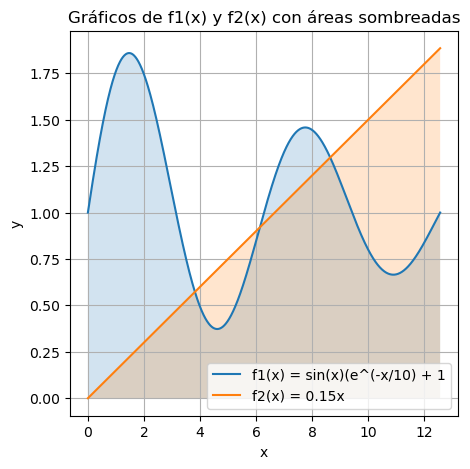

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return np.sin(x) * (np.exp(-x / 10)) + 1

def f2(x):
    return 0.15 * x

x = np.linspace(0, 4 * np.pi, 1000)

y1 = f1(x)
y2 = f2(x)

plt.figure(figsize=(5, 5))
plt.plot(x, y1, label='f1(x) = sin(x)(e^(-x/10) + 1')
plt.plot(x, y2, label='f2(x) = 0.15x')

plt.fill_between(x, 0, y1, alpha=0.2)
plt.fill_between(x, 0, y2, alpha=0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Gráficos de f1(x) y f2(x) con áreas sombreadas')
plt.show()


4. ¿Cuál es el área del espacio que se llenó después de `plt.fill_between`? Aproxima tu resultado con 1'000,000 puntos.

In [40]:
import numpy as np
def f1(x):
    return np.sin(x) * (np.exp(-x / 10)) + 1

def f2(x):
    return 0.15 * x

N = 1000000
x_aleatorios = np.random.uniform(0, 4 * np.pi, N)

y1_aleatorios = f1(x_aleatorios)
y2_aleatorios = f2(x_aleatorios)

puntos_bajo_f1 = sum(y1_aleatorios >= 0)
puntos_bajo_f2 = sum(y2_aleatorios >= 0)

area_f1 = (puntos_bajo_f1 / N) * (4 * np.pi)
area_f2 = (puntos_bajo_f2 / N) * (4 * np.pi)

print("area bajo f1(x):", area_f1)
print("area bajo f2(x):", area_f2)


area bajo f1(x): 12.566370614359172
area bajo f2(x): 12.566370614359172


5. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales ($f_1(x)$, $f_2(x)$, área total)** y el **error** para $N=10^4,\, 10^5,\, 10^6$.

In [96]:
import numpy as np
import pandas as pd

def f1(x):
    return np.sin(x) * (np.exp(-x / 10)) + 1

def f2(x):
    return 0.15 * x

resultados = pd.DataFrame(index=[10**4, 10**5, 10**6], columns=['Integral f1', 'Integral f2', 'Área Total', 'Error'])

a = 0
b = 4 * np.pi

areatotal = (b - a) * (f2(b) - f2(a))

for N in resultados.index:
    x_aleatorios = np.random.uniform(a, b, N)

    y1_aleatorios = f1(x_aleatorios)
    y2_aleatorios = f2(x_aleatorios)

    integral_f1 = np.mean(y1_aleatorios) * (b - a)
    integral_f2 = np.mean(y2_aleatorios) * (b - a)

    error_f1 = np.abs(integral_f1 - areatotal)
    error_f2 = np.abs(integral_f2 - areatotal)
    resultados.loc[N] = [integral_f1, integral_f2, areatotal, error_f1]
(resultados)


,Integral f1,Integral f2,Área Total,Error
10000,13.24497,11.862866,23.687051,10.44208
100000,13.26066,11.892767,23.687051,10.42639
1000000,13.272292,11.842083,23.687051,10.414758


---
### Integración Monte Carlo tipo 2 
Dada una superfice en el espacio $f(x,y)$, una curva de nivel, es el corte transversal donde se cumple $f(x,y)=v$, con $v$ tal que pertenece al dominio de $f$. 



**Función 1:** Encuentre el área de todas las curvas de nivel que cumplan $f(x,y)>v$, donde 
$$
f(x,y)=-xy\,e^{-x^2-y^2},
$$
y $v=0.05$

**Función 2:** Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(x, y):
    return -x * y * np.exp(-x**2 - y**2) > 0.05

numpuntos = 1000
x = np.random.uniform(low=-1, high=1, size=numpuntos)
y = np.random.uniform(low=-1, high=1, size=numpuntos)


resultado = bernoulli(x, y)



In [5]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(x, y):
    return np.exp(-0.5 * x**2 + y**2)* np.sin(x**2 + y**2)> 0.5

numpuntos = 1000
x = np.random.uniform(low=-1, high=1, size=numpuntos)
y = np.random.uniform(low=-1, high=1, size=numpuntos)


resultado = bernoulli(x, y)


2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

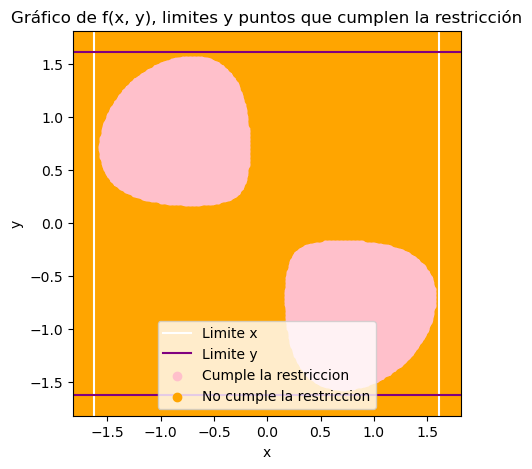

Limites de integracion en x: (-1.62, 1.61)
Limites de integracion en y: (-1.62, 1.61)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return -x * y * np.exp(-x**2 - y**2)

def restriccion(x, y):
    return f(x, y) > 0.05

x = np.linspace(-3, 2, 400)
y = np.linspace(-3, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

x_min = np.min(X[restriccion(X, Y)])
x_max = np.max(X[restriccion(X, Y)])
y_min = np.min(Y[restriccion(X, Y)])
y_max = np.max(Y[restriccion(X, Y)])

plt.figure(figsize=(5, 5))

plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)

plt.axvline(x_min, color='white',label='Limite x')
plt.axvline(x_max, color='white')
plt.axhline(y_min, color='purple',label='Limite y')
plt.axhline(y_max, color='purple')

cumple = restriccion(X, Y)
no_cumple = ~cumple
plt.scatter(X[cumple], Y[cumple], color='pink', label='Cumple la restriccion')
plt.scatter(X[no_cumple], Y[no_cumple], color='orange', label='No cumple la restriccion')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gráfico de f(x, y), limites y puntos que cumplen la restricción')
plt.xlim(x_min - 0.2, x_max + 0.2)
plt.ylim(y_min - 0.2, y_max + 0.2)
plt.legend()
plt.show()

print("Limites de integracion en x: ({:.2f}, {:.2f})".format(x_min, x_max))
print("Limites de integracion en y: ({:.2f}, {:.2f})".format(y_min, y_max))


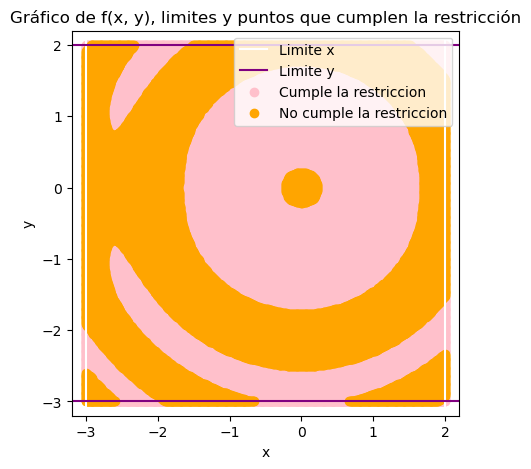

Limites de integracion en x: (-3.00, 2.00)
Limites de integracion en y: (-3.00, 2.00)


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.exp(-0.5 * x**2 + y**2)* np.sin(x**2 + y**2)> 0.05

def restriccion(x, y):
    return f(x, y) > 0.5

x = np.linspace(-3, 2, 400)
y = np.linspace(-3, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

x_min = np.min(X[restriccion(X, Y)])
x_max = np.max(X[restriccion(X, Y)])
y_min = np.min(Y[restriccion(X, Y)])
y_max = np.max(Y[restriccion(X, Y)])

plt.figure(figsize=(5, 5))

plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.9)

plt.axvline(x_min, color='white', label='Limite x')
plt.axvline(x_max, color='white')
plt.axhline(y_min, color='purple', label='Limite y')
plt.axhline(y_max, color='purple')

cumple = restriccion(X, Y)
no_cumple = ~cumple
plt.scatter(X[cumple], Y[cumple], color='pink', label='Cumple la restriccion')
plt.scatter(X[no_cumple], Y[no_cumple], color='orange', label='No cumple la restriccion')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gráfico de f(x, y), limites y puntos que cumplen la restricción')
plt.xlim(x_min - 0.2, x_max + 0.2)
plt.ylim(y_min - 0.2, y_max + 0.2)
plt.legend()
plt.show()

print("Limites de integracion en x: ({:.2f}, {:.2f})".format(x_min, x_max))
print("Limites de integracion en y: ({:.2f}, {:.2f})".format(y_min, y_max))


3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [9]:
import numpy as np

def int(f, x_min, x_max, y_min, y_max, N):
    x = np.random.uniform(x_min, x_max, N)
    y = np.random.uniform(y_min, y_max, N)

    integral = (x_max - x_min) * (y_max - y_min) * np.mean(f(x, y))

    return integral

In [10]:
def f(x, y):
    return -x * y * np.exp(-x**2 - y**2)> 0.05

x_min =-1.62
x_max = 1.61
y_min = -1.62
y_max = 1.61

N = 100000

resultado = int(f, x_min, x_max, y_min, y_max, N)
print("Valor de la integral:", resultado)


Valor de la integral: 3.6655994150000013


In [11]:
import numpy as np

def int(f, x_min, x_max, y_min, y_max, N):
    x = np.random.uniform(x_min, x_max, N)
    y = np.random.uniform(y_min, y_max, N)

    integral = (x_max - x_min) * (y_max - y_min) * np.mean(f(x, y))

    return integral

In [12]:
def f(x, y):
    return np.exp(-0.5 * x**2 + y**2)* np.sin(x**2 + y**2)> 0.5

x_min =-3
x_max = 2
y_min = -3
y_max = 2

N = 100000

resultado = int(f, x_min, x_max, y_min, y_max, N)
print("Valor de la integral:", resultado)


Valor de la integral: 9.927999999999999


4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [104]:
import numpy as np
import pandas as pd

def f(x, y):
    return -x * y * np.exp(-x**2 - y**2) > 0.05

a = 2
b = 2.1
N = 10**np.array([4, 5, 6])

table = pd.DataFrame(columns=["Aproximacion", "Error"], index=N)

def montecarlo(f, N, a, b):
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(a, b, N)
    media = np.mean(f(x, y))
    return media * (b - a)**2

for i in N:
    aproximacion = montecarlo(f, i, a, b)
    table.loc[i, "Aproximacion"] = aproximacion
    table.loc[i, "Error"] = abs(0.0432 - aproximacion)

table



,Aproximacion,Error
10000,0.0,0.0432
100000,0.0,0.0432
1000000,0.0,0.0432


In [13]:
import numpy as np
import pandas as pd

def f(x, y):
    return np.exp(-0.5 * x**2 + y**2)* np.sin(x**2 + y**2)> 0.5

a = 2
b = 2.1
N = 10**np.array([4, 5, 6])

table = pd.DataFrame(columns=["Aproximacion", "Error"], index=N)

def montecarlo(f, N, a, b):
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(a, b, N)
    media = np.mean(f(x, y))
    return media * (b - a)**2

for i in N:
    aproximacion = montecarlo(f, i, a, b)
    table.loc[i, "Aproximacion"] = aproximacion
    table.loc[i, "Error"] = abs(0.0432 - aproximacion)

table



,Aproximacion,Error
10000,0.01,0.0332
100000,0.01,0.0332
1000000,0.01,0.0332


---
### Generación de fractales

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un cuadro perturbado tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

**Fractal 1:**

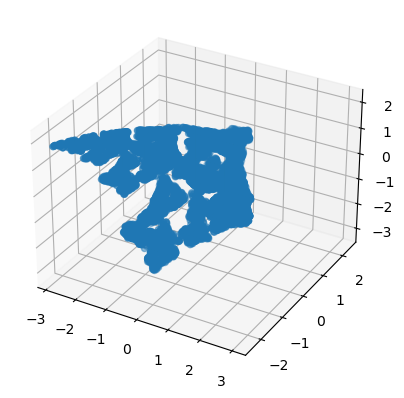

In [95]:
import numpy as np

A0 = np.array([[0.5,0.1853,0],[0.1667,0.3639,-0.0962],[0,0.1555,0.5]])
b0 = np.array([-1.0462,-0.8914,1.2468])

A1 = np.array([[0.5,0.042,0],[-0.1667,0.3639,-0.0962],[0,-0.2382,0.5]])
b1 = np.array([1.6029,-0.8914,0.2826])

A2 = np.array([[0.5,-0.2273,0],[0,-0.3639,0.1925],[0,0.0827,0.5]])
b2 = np.array([-0.5567,-0.8914,-1.5294])

A3 = np.array([[0.383,0,0.3214],[0,0.5,0],[-0.3214,0,0.383]])
b3 = np.array([0,1.2247,0])

x = [np.array([0,0,0])]

A = [A0, A1, A2, A3]
b = [b0, b1, b2, b3]

for k in range(10000):
    i = random.choices([0, 1, 2, 3])[0]
    xkm1 = A[i] @ x[-1] + b[i]
    x.append(xkm1)
   

resultado = np.array(x)



fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(resultado[:, 0],resultado[:, 1], resultado[:, 2])

**Fractal 2:**

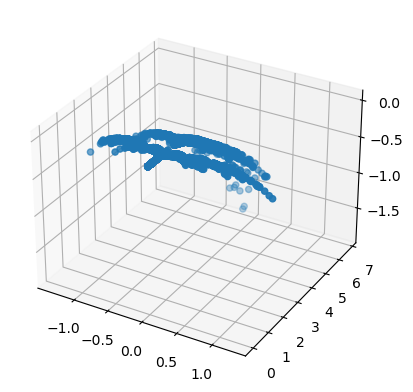

In [94]:
import numpy as np

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

x = [np.array([0,0,0])]

A = [A0, A1, A2, A3]
b = [b0, b1, b2, b3]

for k in range(10000):
    i = random.choices([0, 1, 2, 3])[0]
    xkm1 = A[i] @ x[-1] + b[i]
    x.append(xkm1)
   

resultado = np.array(x)



fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(resultado[:, 0],resultado[:, 1], resultado[:, 2])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
```

---
### Probabilidad Precio-Umbral
Se tiene la siguiente lista de empresas:
- Spotify
- Mercado Libre
- Microsoft
- Walmart
- Google
- Tesla
- Netflix
- Amazon
- Oracle
- Intel

Suponga que desea invertir en dos de ellas. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 30 de septiembre del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas, la fecha de inicio, y la fecha de fin a los cuales se obtendrán los datos.

In [46]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2. Obtenga los precios de cierre ajustados desde el 30 de septiembre de 2021 al 29 de septiembre de 2023.

In [47]:
def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]
data = getClose(["MSFT", "GOOGL"], "2021-09-30", "2023-09-29")

[*********************100%%**********************]  2 of 2 completed


3. Calcule el rendimiento **simple** para ambas empresas.

In [48]:
R = (data-data.shift())/data.shift()

In [49]:
data.describe()

,GOOGL,MSFT
count,502.000000,502.000000
mean,118.046862,284.766770
std,17.811159,35.178195
min,83.430000,212.199982
25%,102.902502,253.430119
50%,117.566250,283.687103
75%,133.671871,318.395561
max,149.838501,358.730469


4. Escriba una función que, dando como argumentos:
* un vector de valores
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

calcula la media, la desviación estándar, y regrese en un _DataFrame_ de _pandas_ datos simulados de una distribución normal caracterizada cuyo índice sea el rango de fechas dadas como argumentos.

In [91]:
import pandas as pd
import numpy as np

def simu(valores, fecha_inicio, fecha_fin, num_escenarios):
    media = np.mean(valores)
    std = np.std(valores)
    
    fechas = pd.date_range(start=fecha_inicio, end=fecha_fin)
    
    datos_simulados = np.random.normal(media, std, size=(num_escenarios, len(fechas)))
    
    df_simulado = pd.DataFrame(data=datos_simulados.T, index=fechas)
    
    return df_simulado

fecha_inicio_simulacion = "2023-09-30"
fecha_fin_simulacion = "2024-09-29"
numescenarios = 1000

valores = np.random.randn(100) 

datos_simulados = simu(valores, fecha_inicio_simulacion, fecha_fin_simulacion, numescenarios)

(datos_simulados)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-09-30,-0.608654,0.314449,-1.285304,-0.095435,-0.917405,1.570317,0.555781,0.271950,0.424396,-2.108725,...,0.331861,-0.302044,-1.920442,0.512945,-0.780334,-1.098084,1.971000,-1.896309,-0.515888,-1.956403
2023-10-01,-1.259371,0.526668,-0.281283,0.552946,-1.211436,-0.352194,-1.622201,-0.422254,-0.834793,-0.054666,...,-1.911025,-0.523754,2.710601,0.686808,-0.248384,-1.455039,-0.389143,0.079268,-1.060397,-0.045570
2023-10-02,-1.780935,0.397931,-0.879902,-1.448909,-0.338650,0.518313,-0.046260,-0.271078,1.803523,-1.743430,...,0.466529,-0.234942,-0.298504,0.485247,1.017158,0.323472,-0.358476,-1.557890,-1.085946,-0.997219
2023-10-03,-0.321869,-0.749312,0.572009,1.664102,-0.056459,-0.335005,1.778361,0.338922,0.916019,-0.136136,...,0.453478,1.671916,-2.324172,0.207630,-0.295152,-1.314496,-1.620682,-0.619899,-0.236124,-1.062524
2023-10-04,-2.328695,0.274678,-1.076871,0.340693,0.909712,-1.564491,-1.305667,0.150567,-3.234721,-1.455172,...,-1.180815,0.289574,0.369634,1.329981,-0.696405,0.452549,-0.827343,-0.588147,-0.947401,-1.298514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,1.121940,0.063247,0.910770,0.099575,-0.028363,0.223328,0.728686,-0.161759,0.865103,0.086554,...,-0.613231,-0.128860,1.270626,-0.698350,2.507355,-0.353376,-0.406157,0.205902,-0.435842,0.689580
2024-09-26,0.264653,0.327859,-0.459409,0.739821,-0.094701,-0.278970,0.068546,-1.744726,1.015474,0.822005,...,-0.577916,1.085174,-0.700435,-0.514967,1.139869,-0.126229,0.211644,1.254121,-1.204958,-0.680614
2024-09-27,-1.427559,0.855535,-0.661514,-0.005450,-1.678932,0.371222,0.034152,0.705045,1.595880,0.339397,...,0.000440,-0.095042,-2.082159,-1.537252,0.887545,0.996301,0.454419,-0.184900,-0.642003,-0.207720
2024-09-28,-1.143225,-0.484306,-0.564383,-0.891307,-2.698817,-0.311304,0.529807,1.106067,0.592439,-1.614073,...,0.565837,0.024464,-1.192026,0.377482,-0.164888,-1.498133,-0.407161,-1.125489,0.219840,-0.932686


5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de marzo de 2023 al 31 de julio de 2023.

In [92]:
import numpy as np
import pandas as pd


fecha_inicio = "2023-03-31"
dias = 100

media_MSFT = R["MSFT"].mean()
std_MSFT = R["MSFT"].std()

def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(start=fecha_inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=R_sim)

simA = sim_R(media_MSFT, std_MSFT, fecha_inicio, dias, 100000)

print("Media de los rendimientos:", media_MSFT)
print("Desviación estándar de los rendimientos:", std_MSFT)
print("Ejemplo de simulación:")
(simA)


Media de los rendimientos: 0.00043755831030537336
Desviación estándar de los rendimientos: 0.019472217358219385
Ejemplo de simulación:


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-03-31,0.001575,-0.042802,-0.007210,0.000541,0.006422,0.018331,-0.010353,0.037854,-0.026219,0.036521,...,0.029560,0.021178,0.008009,-0.007316,0.003792,-0.029320,0.029567,-0.009058,-0.026595,0.010370
2023-04-01,0.026250,-0.003365,-0.011195,0.002578,-0.014969,0.007323,0.007411,0.002426,0.048118,-0.038219,...,0.005846,-0.012412,-0.006965,-0.007832,0.028073,0.018882,-0.000681,0.040013,0.021844,0.013663
2023-04-02,0.009385,-0.001811,0.005774,-0.016962,-0.039249,0.020162,0.004838,0.010545,0.057270,0.008490,...,0.009245,-0.013298,-0.016219,-0.007679,-0.013646,0.014676,0.005433,0.018414,0.005174,-0.009030
2023-04-03,-0.010901,0.011485,-0.006577,0.003395,-0.008300,0.005258,-0.003602,-0.009508,-0.024521,-0.017521,...,0.018589,0.019594,0.034688,0.000070,0.001312,0.008224,-0.009880,0.002047,-0.012023,0.017318
2023-04-04,0.050243,0.002500,0.007469,0.024745,-0.006823,-0.004031,-0.037514,0.020763,0.007087,-0.017100,...,0.006635,-0.015737,0.007696,0.003986,-0.038901,0.006667,0.020129,0.022874,-0.015160,0.001330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-04,-0.004892,0.002286,-0.008155,-0.018131,0.012302,0.000690,0.023525,0.024822,-0.019168,0.012568,...,0.027779,0.004090,-0.005206,-0.021055,0.011937,-0.026364,-0.011860,-0.003206,0.024290,0.020459
2023-07-05,0.011036,0.003833,0.014477,-0.033401,0.012372,-0.006650,-0.024782,-0.023180,-0.057846,0.009699,...,-0.014285,0.012399,-0.014204,0.041710,0.005087,-0.015840,0.006075,-0.005025,0.024849,0.005738
2023-07-06,0.000140,0.009144,0.000935,-0.005390,-0.000844,0.004787,-0.016821,-0.016760,0.006828,-0.017937,...,0.010226,0.013369,-0.007391,0.010547,0.022744,-0.003947,-0.004716,0.025800,0.015799,0.010490
2023-07-07,-0.004035,-0.004790,-0.031843,-0.046097,-0.012993,-0.016445,0.008122,0.004821,0.006822,-0.005273,...,-0.005963,-0.003794,-0.011658,0.020310,0.007811,0.002114,0.024033,0.030882,-0.025227,0.027605


In [97]:
def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size = (dias, N))
    fechas = pd.date_range(start = fecha_inicio, periods = dias)
    return pd.DataFrame(index=fechas, data=R_sim)

simA = sim_R(R["GOOGL"].mean(), R["GOOGL"].std(), "2023-10-01", 365, 1000)
simA

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-01,-0.021734,0.026628,-0.028144,0.048121,-0.022983,0.014145,0.018489,0.000029,0.029612,0.035863,...,0.010449,-0.034478,-0.017727,0.016385,0.003267,0.021128,0.027033,0.022360,0.000577,-0.005446
2023-10-02,0.029091,-0.002929,0.014420,0.007572,-0.027571,-0.010440,-0.002372,0.008106,0.035216,-0.006553,...,0.032386,0.001621,0.011402,-0.007101,-0.011296,0.011532,0.014408,-0.014428,0.037704,0.001141
2023-10-03,0.008892,0.004363,-0.006222,-0.010393,-0.010989,0.002239,0.016959,-0.002098,0.022814,0.016691,...,0.005744,0.024125,-0.013502,0.008308,0.000314,-0.001364,-0.000602,0.027947,-0.008145,0.032299
2023-10-04,0.000386,-0.013482,0.008542,-0.008927,-0.025119,0.008517,0.027695,0.030159,-0.005929,-0.024504,...,0.013438,0.016818,0.013695,-0.043392,-0.005116,0.029059,0.007155,0.014187,-0.007222,-0.008287
2023-10-05,0.026197,-0.015258,0.009013,-0.010153,-0.002087,-0.009460,0.011718,0.016944,-0.002194,0.015675,...,-0.001704,0.007900,-0.020933,0.005106,-0.020966,0.014668,-0.025848,-0.015177,0.021169,-0.040015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,0.000038,0.022837,0.016984,-0.003666,0.019520,0.023044,-0.007169,-0.025597,0.027847,-0.020426,...,-0.004794,-0.048567,-0.033198,-0.000370,0.001178,-0.008913,-0.023283,-0.030373,0.014240,-0.003717
2024-09-26,-0.025872,0.011671,0.006997,0.019920,-0.009287,0.009878,-0.024852,-0.008659,0.030995,0.041433,...,-0.051033,0.021718,-0.030187,-0.022113,-0.013964,-0.048666,-0.017418,0.015107,-0.011465,0.013834
2024-09-27,0.018531,0.024274,0.041094,0.031454,-0.002185,0.038671,0.005306,0.022106,0.013823,-0.024912,...,0.025338,0.007624,-0.022950,-0.003803,0.011559,0.001298,0.017173,-0.007444,0.003397,0.020839
2024-09-28,-0.029190,0.012492,0.001548,-0.012204,0.018850,-0.015272,0.019579,-0.012355,-0.019439,0.011539,...,0.006688,-0.032469,0.033385,0.021478,-0.019001,-0.004858,0.035025,0.007383,0.028271,0.014074


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [93]:
import numpy as np
import pandas as pd

fecha_inicio = "2023-03-31"
dias = 123  

media_MSFT = R["MSFT"].mean()
std_MSFT = R["MSFT"].std()

def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(start=fecha_inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=R_sim)

simA = sim_R(media_MSFT, std_MSFT, fecha_inicio, dias, 100000)

print("Media de los rendimientos:", media_MSFT)
print("Desviación estándar de los rendimientos:", std_MSFT)
print("Ejemplo de simulación:")
(simA)


Media de los rendimientos: 0.00043755831030537336
Desviación estándar de los rendimientos: 0.019472217358219385
Ejemplo de simulación:


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-03-31,0.014618,0.008228,0.013654,0.002548,-0.002991,0.021496,-0.002150,0.016004,-0.019942,0.017470,...,0.003019,0.011735,-0.000461,-0.020582,-0.024116,0.004616,0.052533,-0.050554,0.026900,0.020411
2023-04-01,0.008033,0.010722,0.036570,-0.028410,-0.001770,0.007271,0.009095,-0.010763,-0.022706,0.005913,...,0.011462,-0.036291,-0.005792,0.019179,0.012723,0.006675,-0.044362,0.017642,0.027658,0.010026
2023-04-02,0.006024,0.018894,0.007182,-0.012437,0.010364,0.017792,0.011384,-0.044187,0.018500,-0.014034,...,-0.000656,-0.029801,0.042408,0.005735,0.033779,-0.030924,-0.016140,0.025195,0.012021,-0.010016
2023-04-03,0.002009,-0.013524,-0.022832,0.018493,-0.003405,-0.021315,0.028465,-0.014566,0.014160,0.011124,...,0.004644,-0.004427,0.027227,0.017389,-0.012800,0.030118,0.013753,0.000633,0.017675,0.012241
2023-04-04,0.018519,0.000574,-0.042704,0.000179,0.021631,0.016184,0.010092,-0.006137,-0.024625,-0.004987,...,-0.002696,0.019767,0.022082,0.018324,-0.001719,-0.000837,0.025341,-0.016580,0.015207,0.001018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,0.012965,0.004271,0.027563,0.019018,0.008059,-0.022675,0.026288,0.008563,-0.026953,0.023174,...,-0.033081,-0.012945,0.012665,0.039455,-0.012882,0.012096,-0.022245,0.064387,0.011008,-0.003925
2023-07-28,-0.011682,0.003156,0.015491,0.034894,-0.014833,-0.003742,-0.011532,0.031810,-0.004690,-0.019245,...,-0.003692,0.024552,-0.051207,-0.008499,0.014259,-0.009657,0.020159,-0.003672,-0.007461,-0.041871
2023-07-29,0.033456,0.013333,-0.022725,0.004847,-0.012244,0.020400,0.013219,-0.002311,0.026636,-0.002996,...,-0.003571,-0.018040,-0.003692,-0.006704,-0.003509,0.005558,0.016399,-0.000535,0.026084,-0.026470
2023-07-30,0.005820,-0.019130,0.038968,0.008151,-0.005305,0.005022,0.027719,0.002645,-0.008163,-0.007862,...,0.012552,0.015261,-0.001120,-0.001896,-0.021726,0.040049,-0.011496,0.005457,-0.049551,0.020269


7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

In [98]:
simM = sim_R(R["MSFT"].mean(), R["MSFT"].std(), "2023-10-01", 365, 1000)
simM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-01,-0.026471,-0.014610,-0.018418,-0.020094,-0.016481,-0.030097,-0.010756,-0.005028,0.014218,0.014953,...,0.020465,-0.004615,0.010705,-0.013641,-0.002204,-0.012481,-0.001921,-0.034543,-0.019191,-0.000562
2023-10-02,0.032291,-0.014989,-0.006546,0.003664,0.004378,-0.015984,-0.043035,-0.013469,0.005826,-0.001922,...,-0.000215,-0.002473,0.012540,0.005537,-0.028421,0.035858,0.037992,0.019386,-0.019122,-0.008093
2023-10-03,-0.023000,-0.013315,-0.011181,-0.042838,-0.046130,-0.011006,-0.007786,0.010587,-0.031703,0.009955,...,-0.011618,-0.008318,0.002379,-0.014272,-0.009931,0.033930,-0.006030,-0.007921,0.005878,-0.012136
2023-10-04,-0.023579,0.006139,0.016108,0.013833,-0.000771,-0.002357,0.000963,0.007577,-0.026921,0.004722,...,0.000127,0.026734,-0.009529,-0.002577,0.018884,-0.006462,-0.022293,-0.008140,-0.022707,0.003996
2023-10-05,-0.036834,-0.035391,-0.002322,-0.015607,0.014294,0.004242,0.032124,0.018744,-0.030741,-0.033849,...,-0.016398,0.011086,-0.009937,-0.003330,-0.022081,0.028957,-0.026633,-0.003179,0.018972,0.019121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,0.024052,0.014264,0.021991,-0.009700,0.005238,-0.015763,0.003375,0.013438,0.018345,-0.006019,...,0.010163,0.022525,0.010403,0.019947,-0.021567,0.022006,0.000953,0.023140,0.019706,-0.024105
2024-09-26,0.019744,-0.010807,0.000154,-0.008141,-0.032757,0.021277,-0.040503,-0.034368,0.013833,-0.036242,...,-0.038275,-0.017636,-0.019151,0.020175,-0.017297,0.054228,0.009861,0.003647,-0.020248,-0.032632
2024-09-27,0.002638,-0.014115,-0.049081,-0.003527,0.003470,-0.003757,-0.017993,-0.008715,-0.000035,0.007088,...,-0.004706,-0.012494,0.023419,0.031841,0.000402,-0.013017,0.022844,0.006536,0.004927,0.005467
2024-09-28,-0.008684,-0.004781,-0.003673,0.015143,-0.006467,-0.008683,-0.024042,-0.018557,0.014839,-0.019411,...,-0.005638,0.005848,-0.017247,0.020069,-0.009498,-0.019171,-0.013071,0.023875,-0.037376,0.020002


In [99]:
simG = sim_R(R["GOOGL"].mean(), R["GOOGL"].std(), "2023-10-01", 365, 1000)
simG

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-01,0.022759,0.006229,0.003546,-0.031506,0.010120,-0.026941,0.014227,0.012040,0.018323,0.011157,...,-0.011604,-0.006601,-0.020420,0.016893,-0.006234,0.006049,-0.033528,0.040071,0.003665,-0.033466
2023-10-02,0.015806,0.002039,0.020171,0.005900,0.030049,-0.021307,-0.019775,-0.020795,-0.005728,-0.014436,...,0.024881,-0.002008,0.044311,-0.000333,-0.004746,0.002281,-0.053392,-0.029368,-0.007163,0.020926
2023-10-03,0.004355,-0.017767,0.017241,-0.000917,-0.000835,-0.005264,0.002700,0.004249,0.016460,-0.001491,...,0.005617,-0.025052,-0.049563,-0.010819,0.017214,0.018826,0.005162,0.009044,0.002971,0.012122
2023-10-04,0.005040,-0.010998,0.011792,0.001412,0.026514,-0.025858,-0.040297,0.032268,-0.013541,0.002634,...,0.007890,-0.004283,-0.020090,0.007531,0.008694,0.037452,-0.001478,0.030615,0.035548,-0.013788
2023-10-05,0.010821,0.017037,-0.017160,0.015062,0.017509,-0.004599,0.005043,-0.034506,0.014097,0.018573,...,0.005036,0.013801,-0.009557,-0.007303,-0.031076,-0.009617,-0.065001,-0.004425,0.018558,0.007415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,-0.006020,0.006582,-0.000661,0.009702,-0.010599,-0.020261,-0.007309,0.027656,0.006100,0.016705,...,-0.002500,0.022983,0.013900,-0.021513,-0.008521,-0.028846,0.013204,0.000619,-0.022778,0.005984
2024-09-26,-0.014038,0.000933,-0.009383,0.030256,-0.010774,0.033971,-0.002268,-0.050907,0.029390,0.037950,...,-0.050841,0.018800,-0.006699,-0.007442,0.006328,-0.001449,0.018947,0.008726,0.025307,-0.015958
2024-09-27,-0.017522,0.034445,-0.028707,-0.010627,-0.005999,0.000733,0.041954,-0.015375,-0.010020,-0.000926,...,-0.034954,-0.009052,-0.007972,-0.005954,-0.007358,0.012926,0.004646,0.002561,0.022873,0.004411
2024-09-28,-0.051388,0.008449,0.015888,-0.005265,-0.019316,-0.015223,0.011906,-0.015498,-0.018798,-0.009202,...,-0.016535,-0.017057,0.000457,0.041638,-0.029992,-0.014394,0.026839,-0.003079,-0.036606,-0.010527


In [100]:
precios_simuladosG = (1 + simM).cumprod()*data["GOOGL"][-1]
precios_simuladosG

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-01,128.807599,130.376943,129.873085,129.651384,130.129419,128.327805,130.886893,131.644741,134.191194,134.288368,...,135.017744,131.699366,133.726430,130.505203,132.018383,130.658593,132.055863,127.739654,129.770827,132.235659
2023-10-02,132.966950,128.422710,129.022922,130.126391,130.699148,126.276619,125.254219,129.871570,134.973017,134.030242,...,134.988747,131.373726,135.403377,131.227755,128.266343,135.343738,137.072901,130.215961,127.289386,131.165414
2023-10-03,129.908651,126.712726,127.580326,124.552076,124.670003,124.886882,124.278946,131.246550,130.694009,135.364489,...,133.420387,130.280990,135.725505,129.354861,126.992501,139.935974,136.246390,129.184461,128.037591,129.573583
2023-10-04,126.845491,127.490583,129.635371,126.275011,124.573932,124.592506,124.398579,132.240943,127.175584,136.003625,...,133.437297,133.763887,134.432235,129.021523,129.390623,139.031645,133.209072,128.132958,125.130293,130.091311
2023-10-05,122.173304,122.978560,129.334319,124.304230,126.354621,125.121018,128.394726,134.719700,123.266040,131.400055,...,131.249214,135.246798,133.096348,128.591932,126.533558,143.057544,129.661299,127.725630,127.504279,132.578781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,196.702038,112.462201,171.770856,85.463441,99.753066,79.232525,102.012602,124.727989,135.424418,133.949321,...,133.482583,73.367221,185.871631,231.174129,174.758350,123.383065,77.546350,70.809745,147.383037,45.285594
2024-09-26,200.585785,111.246846,171.797312,84.767666,96.485478,80.918355,97.880763,120.441301,137.297760,129.094685,...,128.373491,72.073343,182.312074,235.837970,171.735551,130.073901,78.311007,71.067966,144.398864,43.807855
2024-09-27,201.114938,109.676543,163.365405,84.468699,96.820280,80.614317,96.119604,119.391659,137.292992,130.009681,...,127.769413,71.172843,186.581661,243.347330,171.804562,128.380757,80.099962,71.532469,145.110345,44.047368
2024-09-28,199.368374,109.152196,162.765285,85.747850,96.194165,79.914378,93.808723,117.176089,139.330329,127.486062,...,127.049040,71.589041,183.363725,248.230997,170.172822,125.919632,79.052951,73.240326,139.686697,44.928389


In [63]:
precios_simuladosM = (1 + simM).cumprod()*data["MSFT"][-1]
precios_simuladosM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-09-30,318.134994,303.739133,307.699192,332.362925,309.303991,311.068339,313.969800,309.985184,305.234771,305.541029,...,316.314564,318.888368,319.478786,315.605289,307.817624,320.171043,315.114428,313.966583,321.199155,313.728767
2021-10-01,311.506926,306.229906,305.613091,333.204272,301.328202,312.300248,311.201876,309.339784,301.964401,314.609958,...,323.407756,323.487200,310.946243,322.685856,307.940799,322.797076,315.128929,316.017499,326.529622,322.240253
2021-10-02,309.637138,300.930491,306.723586,332.516041,309.699738,311.388262,308.220540,308.344782,306.887291,314.882275,...,315.584635,328.488388,314.902992,331.208848,306.691459,312.325981,306.965258,312.308735,327.025100,324.164322
2021-10-03,318.249867,297.974506,302.805595,336.176908,304.576725,313.516472,311.500840,316.917783,296.276634,314.585180,...,298.415639,325.263477,312.148621,329.348297,306.604286,312.920286,313.381165,319.381404,335.039245,322.388178
2021-10-04,313.484577,292.072112,304.106970,330.991830,301.470468,320.435782,306.705341,315.306880,299.320759,304.051324,...,312.515804,321.438730,305.397206,324.376705,313.841280,312.297477,320.663997,320.359624,335.004818,326.664524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,352.506957,260.755706,246.270660,283.998756,158.733473,328.930460,296.678125,303.745093,238.773812,339.869040,...,558.029379,452.900961,317.817596,342.774121,287.507953,513.282990,343.044666,341.093708,366.918260,335.780732
2022-09-26,350.930646,269.440992,248.984078,280.422348,159.022846,330.064855,294.950120,310.803788,240.769624,334.320076,...,555.917302,442.563045,317.496466,341.704361,292.170134,497.276037,344.395742,340.431062,368.299732,328.336159
2022-09-27,346.437416,263.526874,248.049368,289.581210,157.982576,315.557980,287.799193,310.083566,238.111155,325.505535,...,541.612912,442.591712,312.061091,350.705832,294.929904,507.246427,344.627568,346.996599,376.373729,315.761260
2022-09-28,340.271386,267.111801,244.828182,287.147493,150.281743,307.995676,285.394175,304.500971,236.933885,326.639923,...,551.721893,438.400686,305.277635,347.223222,287.371667,508.255629,354.467788,354.522006,391.482916,315.332218


In [103]:
valor_deseadoM = data["MSFT"][-1]*1.1
data["MSFT"][-1], valor_deseadoM

(313.6400146484375, 345.0040161132813)

In [104]:
valor_deseadoG = data["GOOGL"][-1]*1.1
data["GOOGL"][-1], valor_deseadoG

(132.30999755859375, 145.54099731445314)

In [105]:
sobrepasaM = valor_deseadoM <= precios_simuladosM
sobrepasaM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-10-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-10-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-10-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-10-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
2022-09-26,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
2022-09-27,True,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,True,False,True,True,False
2022-09-28,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,True,True,True,True,False


In [106]:
sobrepasaG = valor_deseadoG <= precios_simuladosG
sobrepasaG

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-10-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,True,False,True,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,True,False
2024-09-26,True,False,True,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2024-09-27,True,False,True,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2024-09-28,True,False,True,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False


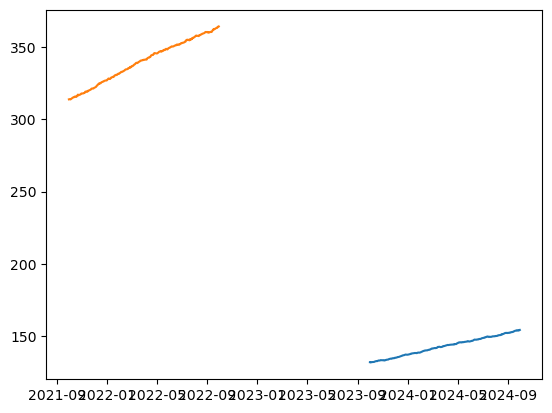

In [107]:
plt.figure()
plt.plot(precios_simuladosG.mean(axis=1))

plt.plot(precios_simuladosM.mean(axis=1))
